In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [219]:
# Read latest survey data and concatenate ISSCC and VLSI data
data = "../xls/ADCsurvey_latest.xlsx"
df1 = pd.read_excel(data, sheet_name='ISSCC')
df2 = pd.read_excel(data, sheet_name='VLSI')
df = pd.concat([df1, df2])
df = df[df['AREA [mm^2]'] != 0]

In [220]:
# Show headers of data table
print(df.keys())

Index(['YEAR', 'ID', 'TYPE', 'ARCHITECTURE', 'TECHNOLOGY', 'TITLE', 'ABSTRACT',
       'AUTHORS', 'DOI', 'LINK', 'COMMENTS', 'VSUP1 [V]', 'VSUP2 [V]',
       'VSUP3 [V]', 'Csamp [pF]', 'AREA [mm^2]', 'SNDR_lf [dB]', 'fin_hf [Hz]',
       'SNDR_hf [dB]', 'SNR [dB]', 'DR [dB]', '-THD [dB]', 'SFDR [dB]',
       'SNDR_plot [dB]', 'P [W]', 'fs [Hz]', 'OSR', 'fsnyq [Hz]',
       'fcenter [Hz]', 'P/fsnyq [pJ]', 'FOMW_lf [fJ/conv-step]',
       'FOMW_hf [fJ/conv-step]', 'FOMS_lf [dB]', 'FOMS_hf [dB]',
       'FOMW_hf/fsnyq', 'FOMS,hf+10log(fsnyq)'],
      dtype='object')


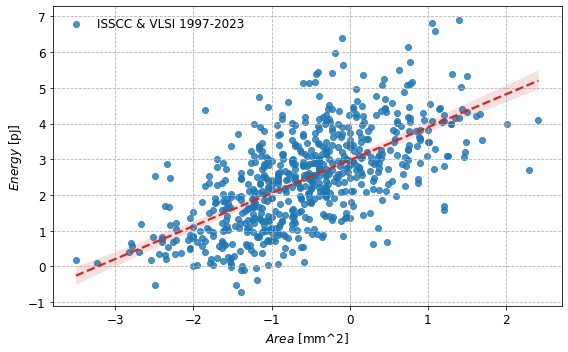

In [221]:
# Figure settings
font=12
size=(8, 5)

df['log_AREA'] = np.log10(df['AREA [mm^2]'])
df['log_P'] = np.log10(df['P [W]'])

fig, ax = plt.subplots(figsize=size)
#ax.plot(df['AREA [mm^2]'], df['P [W]'], 'b.', ms=15, label='ISSCC & VLSI 1997-%d' %max(df['YEAR']))
sns.regplot(x='log_AREA', y='log_P', data=df, order=1, ci=95, line_kws={'linestyle':"--", 'color':"#c72e29"}, label='ISSCC & VLSI 1997-%d' %max(df['YEAR']))
plt.legend(frameon=False, fontsize=font)
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim((0, 50))
#ax.set_ylim((1e-1, 1e8))
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xlabel('$Area$ [mm^2]', fontsize=font)
plt.ylabel('$Power$ [W]', fontsize=font)
plt.grid(linestyle='--')
fig.tight_layout()
plt.savefig('./area_power.pdf')
plt.show()